<a href="https://colab.research.google.com/github/shravanineeli/ML_Projects/blob/main/Linear_Regression_Spotify_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Starter Code**

To begin the Regression Model for Spotify, we need to first import all the libraries we would need.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify_Youtube.csv') #uploading our dataset as df

# **SEMMA**

# **S: Sampling**


Let's decide if we want to sample or not based on the number of rows and columns.

In [ ]:
df.head(10) #having a quick glance at df to determine which columns are related to YT and Spotify

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,1.066615e+07
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,1.596059e+08
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,4.267190e+07
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,154761056.0,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08


In [ ]:
df.shape #checking the number of rows and columns in df

(20718, 28)

As we have 20k rows and 28 columns, we are not going to sample this dataset as we have reasonable amount of rows and columns.

Now we are going to fliter data through dropping all Youtube related data as the focus of the regression model is on Spotify only.

We are now creating df1 which has columns and rows only related to Spotify.

In [ ]:
df1 = df.drop(['Unnamed: 0','Url_youtube','Title','Channel','Views','Likes','Comments','Description','Licensed','official_video'], axis=1)

We are now also going to convert the Duration_ms from milliseconds to minutes for easier understanding.

In [ ]:
df1['Duration_ms'] = df1['Duration_ms']/60000

In [ ]:
df1.rename(columns={'Duration_ms': 'Duration'}, inplace=True)

In [ ]:
df1.shape #checking the number of rows and columns in df1 after dropping

(20718, 18)

In [ ]:
df1.head(10) #rechecking to make sure all YT related columns were dropped and duration of the songs are in minutes

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,6.172597e+08
5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,-5.852,0.0372,0.022900,0.086900,0.2980,0.966,120.264,4.083333,3.238503e+08
6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,-7.185,0.0629,0.012000,0.262000,0.3250,0.358,127.030,4.569033,1.066615e+07
7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,-5.886,0.0313,0.007990,0.081000,0.1120,0.462,140.158,3.492667,1.596059e+08
8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,-3.340,0.0465,0.003430,0.103000,0.3250,0.643,120.012,3.562500,4.267190e+07
9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,-7.176,0.1620,0.031500,0.081100,0.6720,0.865,192.296,3.840433,1.910747e+08


# **E: Exploration and M: Modify**

The main steps in Exploration and Modify are:

    1. Looking at the number of rows and columns
    2. Looking at the variable types
    3. Treating missing values
    4. Treating outliers
    5. Data Visualization

In [ ]:
df1.shape #step 1: looking at the number of rows and columns

(20718, 18)

In [ ]:
df1.dtypes #step 2: looking at all variables types

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration            float64
Stream              float64
dtype: object

In [ ]:
#changing all object variables to categorical variables
df1['Artist'] = df1['Artist'].astype('category')
df1['Url_spotify'] = df1['Url_spotify'].astype('category')
df1['Track'] = df1['Track'].astype('category')
df1['Album'] = df1['Album'].astype('category')
df1['Album_type'] = df1['Album_type'].astype('category')
df1['Uri'] = df1['Uri'].astype('category')
df1['Key'] = df1['Key'].astype('category')

In [ ]:
df1.dtypes #rechecking whether the variables types have changed

Artist              category
Url_spotify         category
Track               category
Album               category
Album_type          category
Uri                 category
Danceability         float64
Energy               float64
Key                 category
Loudness             float64
Speechiness          float64
Acousticness         float64
Instrumentalness     float64
Liveness             float64
Valence              float64
Tempo                float64
Duration             float64
Stream               float64
dtype: object

In [ ]:
#creating df2 which contains no categorical data
df2 = df1.drop(['Artist','Url_spotify','Track','Album','Album_type','Uri', 'Key'], axis=1)

In [ ]:
df2.shape #looking at the number of columns after dropping categorical data

(20718, 11)

In [ ]:
df2.head(10) #rechecking whether the categorical data is dropped

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Stream
0,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,1.040235e+09
1,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,3.100837e+08
2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,6.306347e+07
3,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,4.346636e+08
4,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,6.172597e+08
5,0.760,0.891,-5.852,0.0372,0.022900,0.086900,0.2980,0.966,120.264,4.083333,3.238503e+08
6,0.716,0.897,-7.185,0.0629,0.012000,0.262000,0.3250,0.358,127.030,4.569033,1.066615e+07
7,0.726,0.815,-5.886,0.0313,0.007990,0.081000,0.1120,0.462,140.158,3.492667,1.596059e+08
8,0.741,0.913,-3.340,0.0465,0.003430,0.103000,0.3250,0.643,120.012,3.562500,4.267190e+07
9,0.625,0.877,-7.176,0.1620,0.031500,0.081100,0.6720,0.865,192.296,3.840433,1.910747e+08


In [ ]:
df2.isnull().sum() #step 3: looking at missing values

Danceability          2
Energy                2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration              2
Stream              576
dtype: int64

We are deleting all missing value rows as they are not in high percentage when compared to the entire df1. Hence, deleting the missing values is the best route for treating the missing values.

In [ ]:
df3 = df2.dropna(axis=0, how= 'any') #creating df2 containing zero missing values

In [ ]:
df3.shape #looking at the number of rows after removing the missing values

(20140, 11)

In [ ]:
df3.isnull().sum() #rechecking that df2 has no missing values

Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration            0
Stream              0
dtype: int64

## **Univariate Exploration**

In [ ]:
df3.describe(include='all') #performing descriptive statstics for all variables

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Stream
count,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,2.014000e+04
mean,0.620460,0.635153,-7.644976,0.095312,0.291900,0.055457,0.192971,0.529521,120.628974,3.740613,1.359430e+08
std,0.165506,0.214007,4.633981,0.106977,0.286446,0.192882,0.167876,0.245295,29.601307,2.096906,2.441441e+08
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.516417,6.574000e+03
25%,0.519000,0.507000,-8.794000,0.035700,0.045400,0.000000,0.094175,0.339000,96.994000,2.998575,1.767260e+07
50%,0.638000,0.666000,-6.515000,0.050600,0.194000,0.000002,0.125000,0.537000,119.965000,3.553083,4.967698e+07
75%,0.741250,0.798000,-4.922000,0.104000,0.477000,0.000427,0.236000,0.726000,139.952250,4.200000,1.383525e+08
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,3.386520e+09


In [ ]:
df3.mode()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Stream
0,0.687,0.572,-7.818,0.0324,0.114,0.0,0.11,0.961,77.986,3.957783,169769959.0


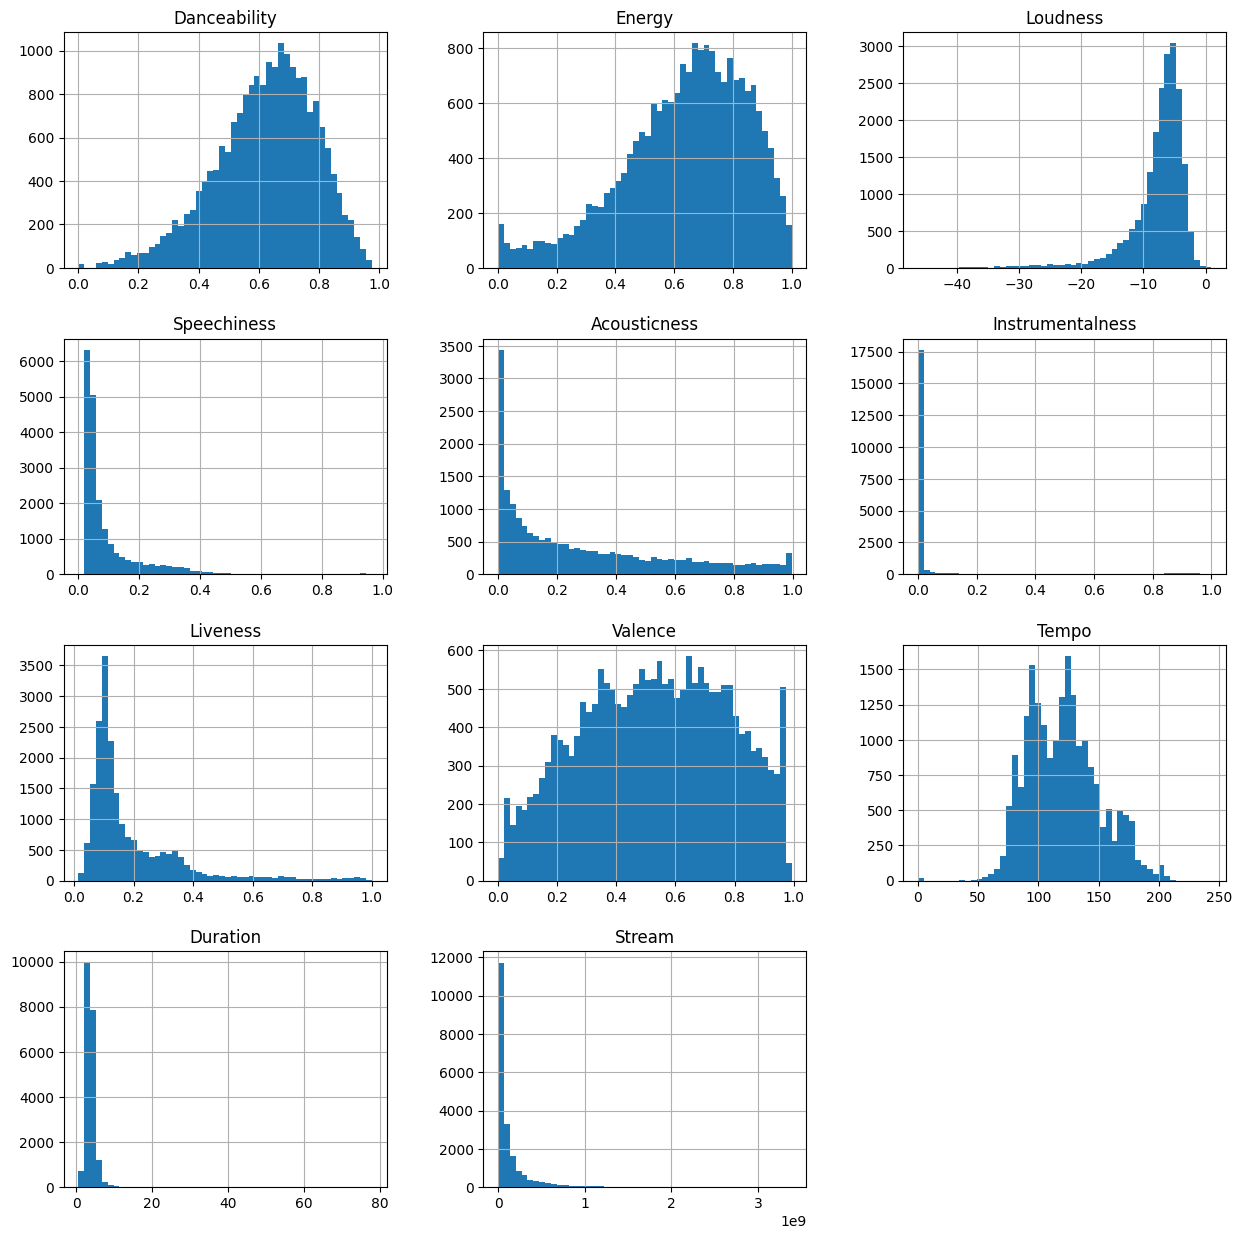

In [ ]:
df3.hist(bins=50, figsize=(15,15)) #visualizing the distribution of all variables
plt.show()

From the univariate analysis, we can notice the following for each variable:

1. Acousticness
      
    For acousticness, we can see that the mean, median and mode are not close as they are 0.29, 0.19, and 0.11 respectively. This suggests that acousticness is not normally distrubted, which is further verified by the histogram which shows that the variable is right skewed.

2. Instrumentalness
    
    For instrumentalness, we can see that the mean is not very close to the median and mode as they are 0.06, 0.00, and 0.00 respectively. This suggests that instrumentalness is not normally distrubted, which is further verified by the histogram which shows that the variable is right skewed.

3. Liveness
    
    For liveness, we can see that the mean is not very close to the median and mode as they are 0.19, 0.13, and 0.11 respectively. This suggests that liveness is not normally distrubted, which is further verified by the histogram which shows that the variable is right skewed.

4. Valence
    
    For valence, we can see that the mode is not very close to the median and mean as they are 0.96, 0.53, and 0.54 respectively. This suggests that valence might be normally distrubted, however is not due to a possible data entry error. This is further supported by the histogram which follows a bell-shape for most part of the data but has a sudden rise around 0.97 causing a disruption from the bell-shape.

5. Tempo
    
    For tempo, we can see that the mode is not very close to the median and mean as they are 77.99, 119.97, and 120.63 respectively. This suggests that tempo is normally distrubted, as supported by the histogram which follows a bell-shape for most part except for the slight rise pattern from 150-200. However, this sudden could be considered as a possible data entry error.

6. Duration
   
    For duration, we can see that mean, median and mode are close as they are 3.74, 3.55, and 3.96 respectively. This suggests that it is normally distributed, which can further be noticed through the histogram.

7. Danceability

    For danceability we can tell by looking at the graph that it resembles a normal distribution to some extent, although it is too far skewed to the left, and that all three factors of measurement for the descriptive statistics are very close to eachother. The mean, median and mode are 0.62, 0.63, 0.68.

8. Energy

    We can tell that the graph for energy and danceability look very similar, the only real difference are the low points close to each axis end. The graph is skewed to the left and is not normally distributed. The mean, median and mode are 0.63, 0.66, 0.57.


9. Loudness

    The loudness graph shows us that the graph is left skewed and not normally distributed. The mean, median and mode of the graph is -7.64, 6.51 and -7.82, and we can tell that the mean and mode are very close together.

10. Speechiness

    For the speechiness graph it starts off very steep and not at 0, which would mean that there are no songs with only instrumentals and no lyrics. The graph also has a very steep right skew, and is not normally distributed. The mean, median and mode for the graph is 0.09, 0.05, 0.03.


Now we are going to look at outliers and treat them.

<Axes: >

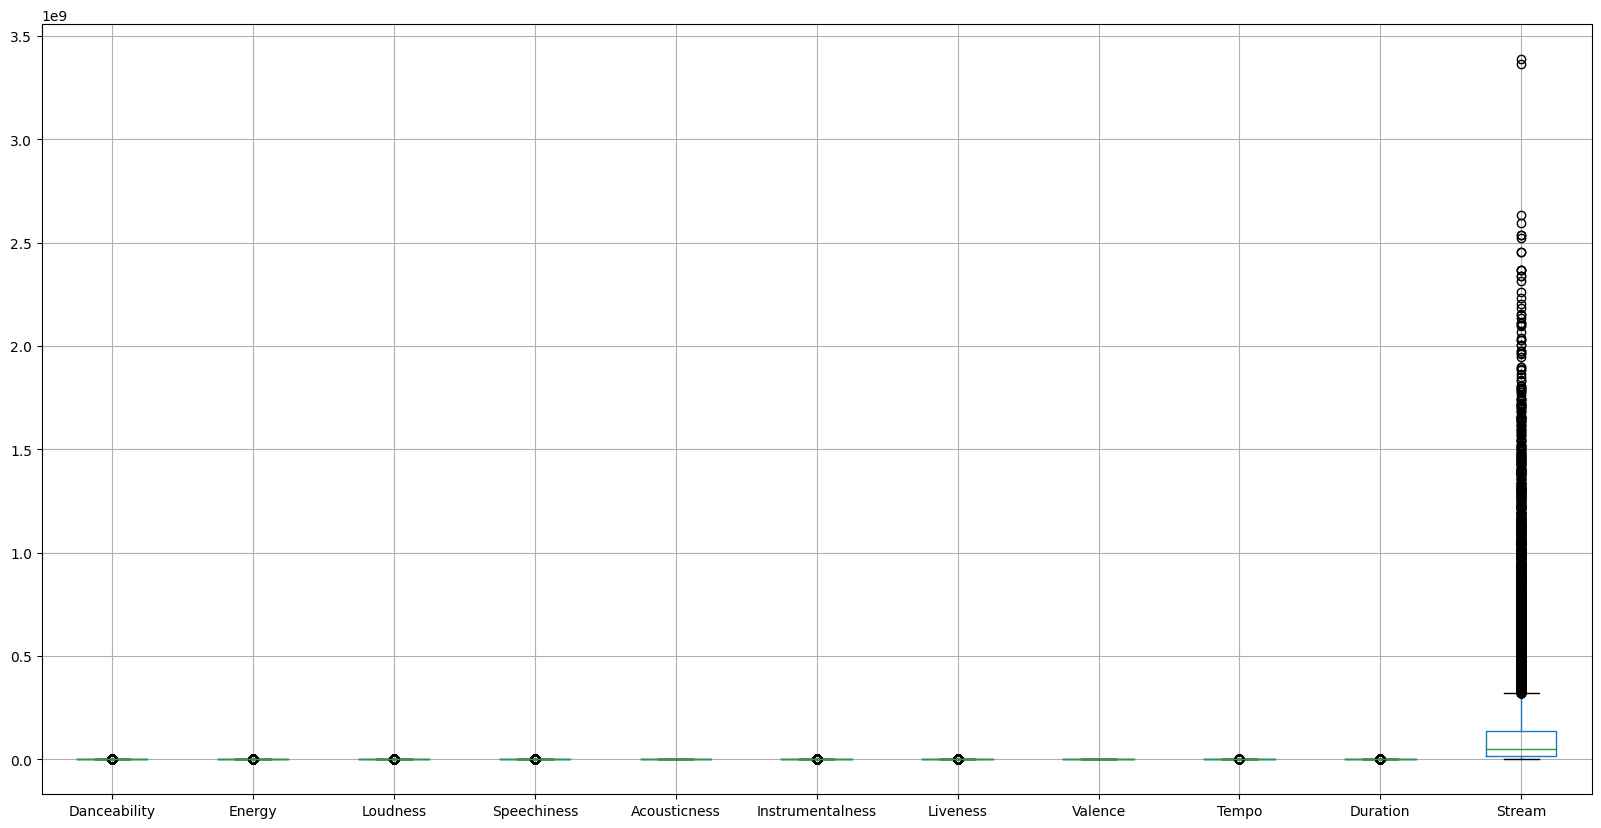

In [ ]:
df3.boxplot(figsize=(20,10))

Looking at each variable's outliers in individual boxplots to treat the outliers to make the individual variable distribution close to a normal distribution.

<Axes: >

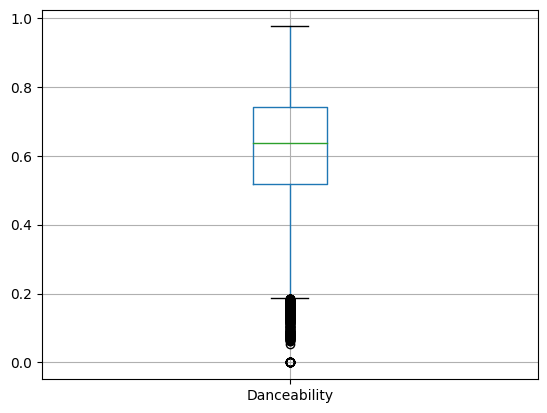

In [ ]:
df3.boxplot('Danceability')

In [ ]:
df3 = df3[df3['Danceability'] > 0.17]

<Axes: >

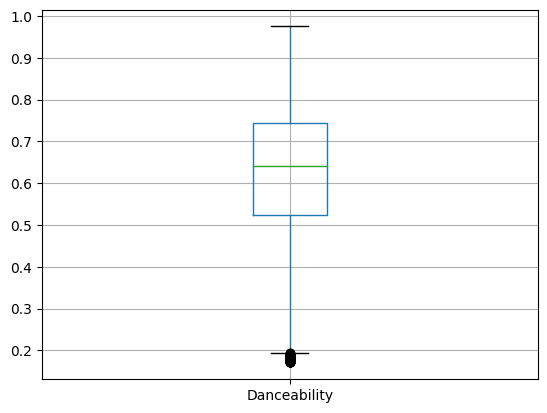

In [ ]:
df3.boxplot('Danceability')

<Axes: >

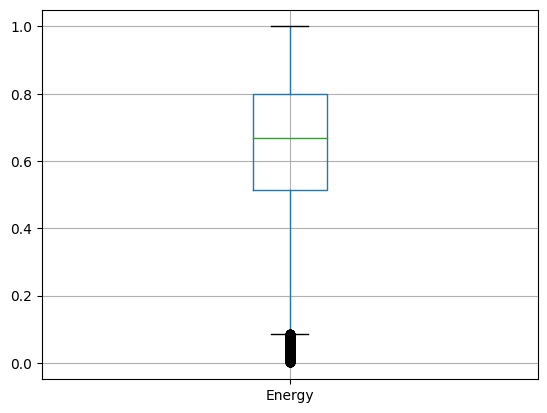

In [ ]:
df3.boxplot('Energy')

In [ ]:
df3 = df3[df3['Energy'] > 0.14]

<Axes: >

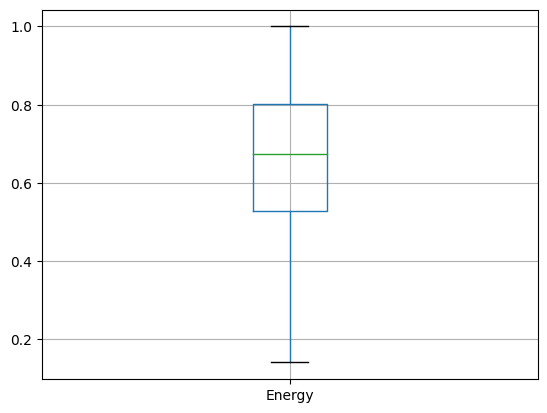

In [ ]:
df3.boxplot('Energy')

<Axes: >

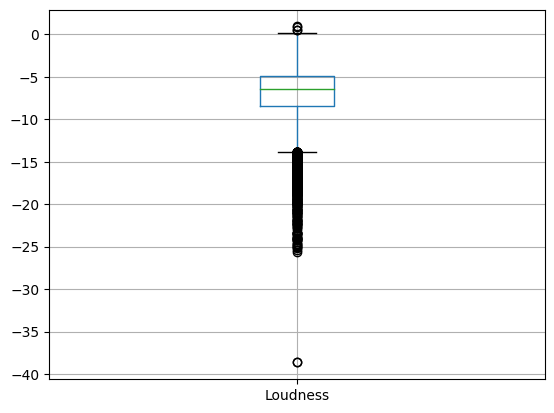

In [ ]:
df3.boxplot('Loudness')

In [ ]:
df3 = df3[df3['Loudness'] > - 15]

<Axes: >

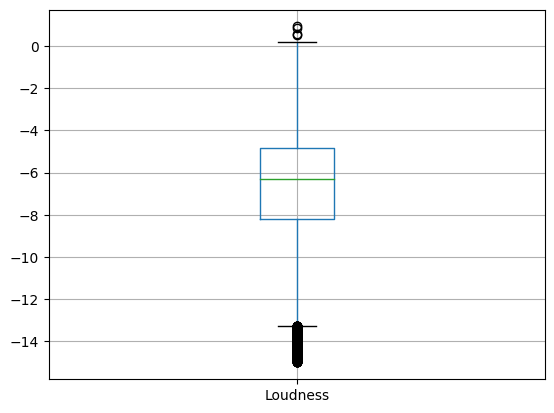

In [ ]:
df3.boxplot('Loudness')

<Axes: >

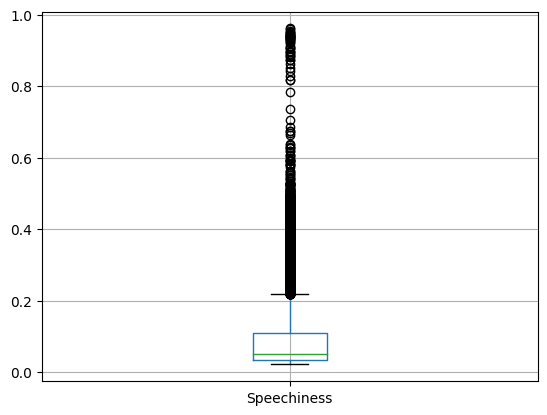

In [ ]:
df3.boxplot('Speechiness')

In [ ]:
df3 = df3[df3['Speechiness'] < 0.2]

<Axes: >

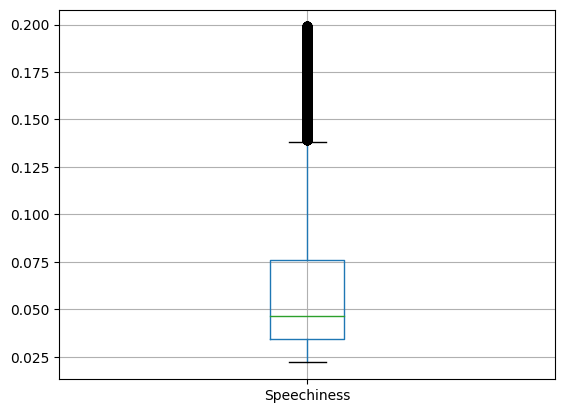

In [ ]:
df3.boxplot('Speechiness')

In [ ]:
df3 = df3[df3['Speechiness'] < 0.135]

<Axes: >

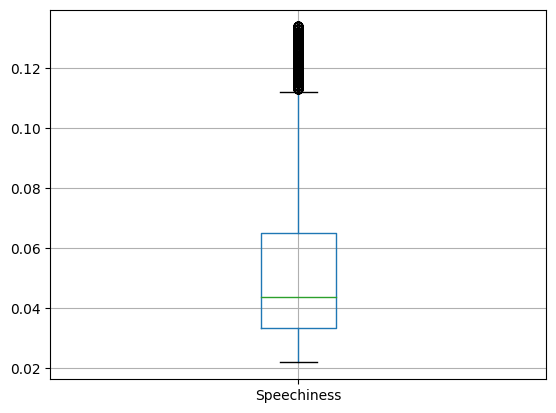

In [ ]:
df3.boxplot('Speechiness')

In [ ]:
df3 = df3[df3['Speechiness'] < 0.115]

<Axes: >

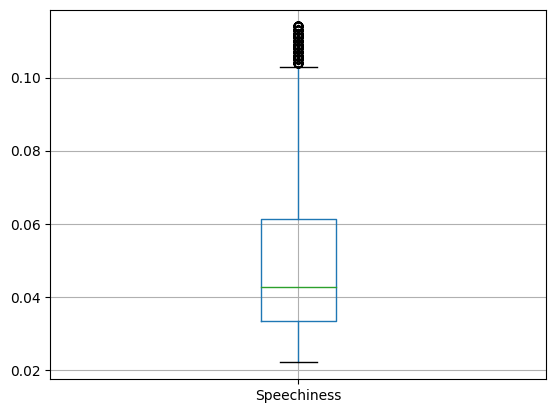

In [ ]:
df3.boxplot('Speechiness')

<Axes: >

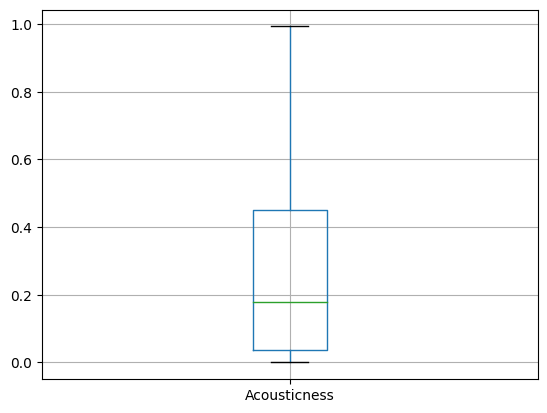

In [ ]:
df3.boxplot('Acousticness')

<Axes: >

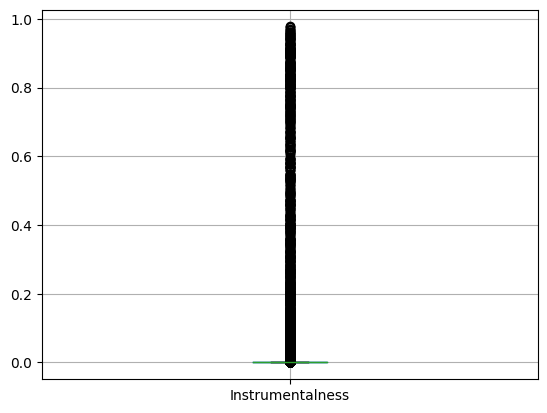

In [ ]:
df3.boxplot('Instrumentalness')

In [ ]:
df3 = df3[df3['Instrumentalness'] < 0.09]

<Axes: >

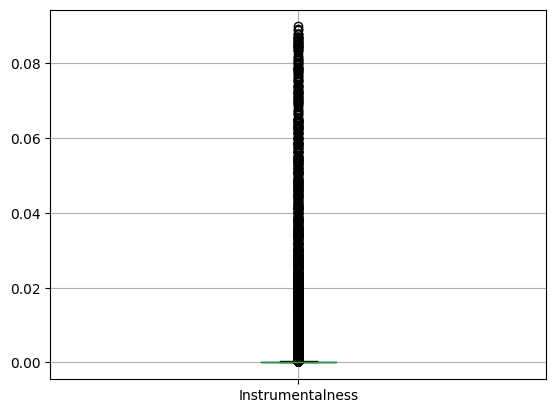

In [ ]:
df3.boxplot('Instrumentalness')

<Axes: >

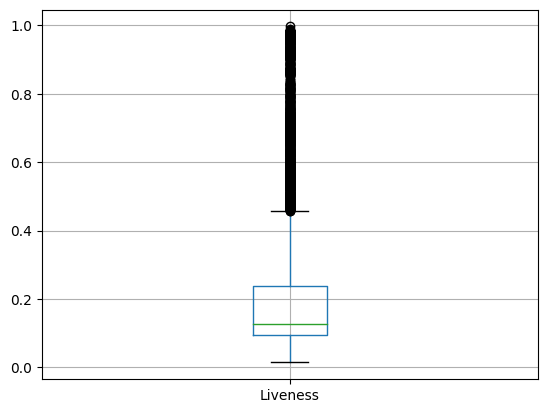

In [ ]:
df3.boxplot('Liveness')

In [ ]:
df3 = df3[df3['Liveness'] < 0.5]

<Axes: >

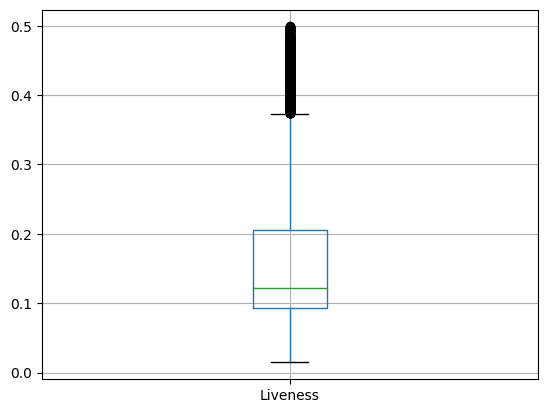

In [ ]:
df3.boxplot('Liveness')

<Axes: >

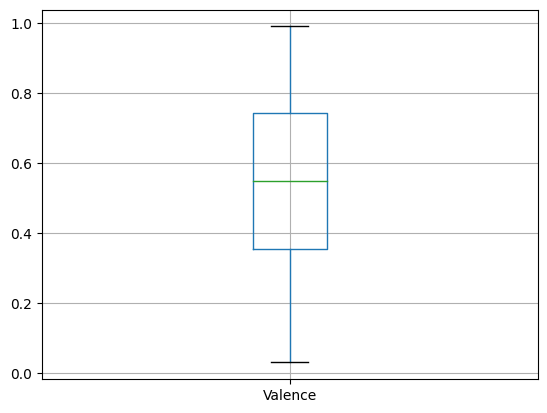

In [ ]:
df3.boxplot('Valence')

We are changing 0.95 in Valence to 0.59 as we had previously identified this to be a data-entry error.

In [ ]:
df3['Valence'].replace(to_replace=0.95, value=0.59, inplace=True)

array([[<Axes: title={'center': 'Valence'}>]], dtype=object)

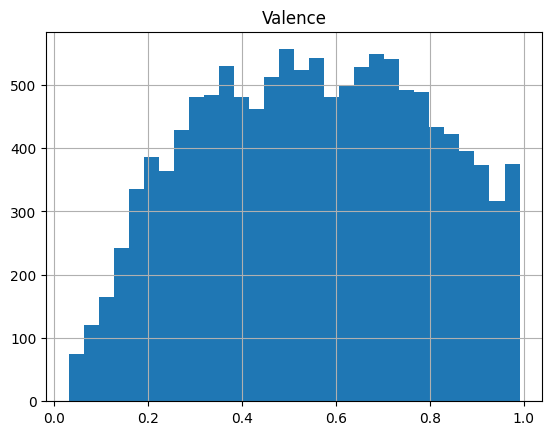

In [ ]:
df3.hist('Valence', bins=30)

<Axes: >

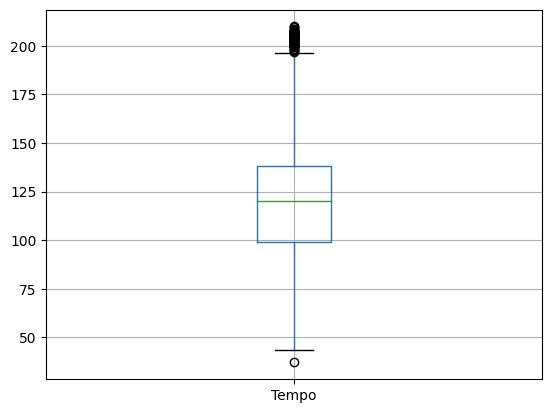

In [ ]:
df3.boxplot('Tempo')

In [ ]:
df3 = df3[df3['Tempo'] < 200]

<Axes: >

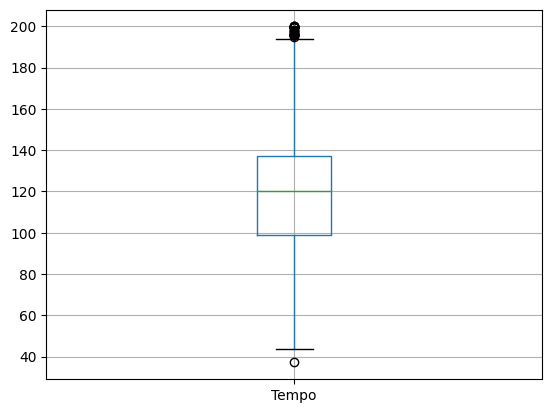

In [ ]:
df3.boxplot('Tempo')

<Axes: >

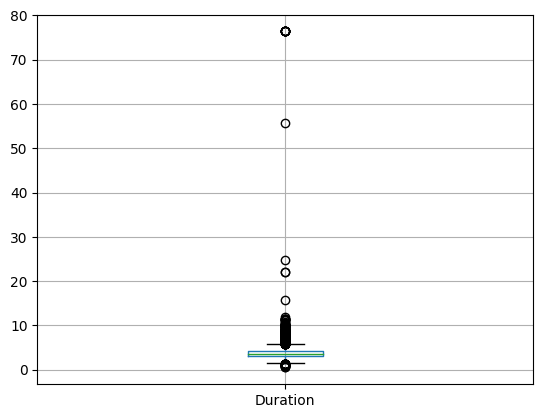

In [ ]:
df3.boxplot('Duration')

In [ ]:
df3 = df3[df3['Duration'] < 10]

<Axes: >

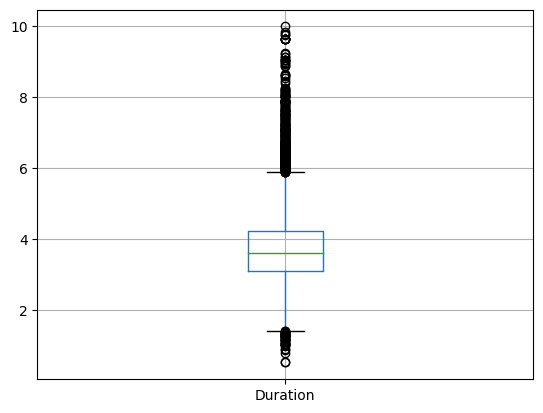

In [ ]:
df3.boxplot('Duration')

In [ ]:
df3 = df3[df3['Duration'] < 6]
df3 = df3[df3['Duration'] > 1.5]

<Axes: >

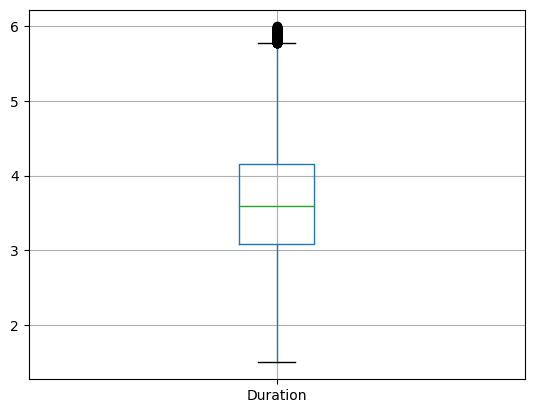

In [ ]:
df3.boxplot('Duration')

<Axes: >

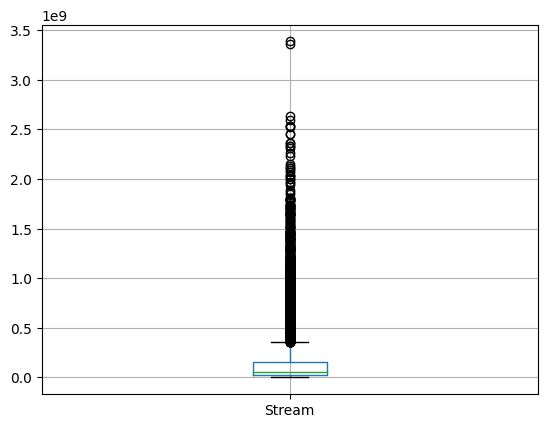

In [ ]:
df3.boxplot('Stream') #will not make any changes to outliers as Stream is our y-variable

In [ ]:
df3.shape

(12145, 11)

## **Bivariate Analysis**

Now we are going to look at the correlation matrix in order to see the relationship between all variables, and mostly focus on the relationship of all x-variables with the y-variable.

In [ ]:
df3.corr()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Stream
Danceability,1.000000,0.137307,0.151670,0.211425,-0.151168,-0.023199,-0.078784,0.442564,-0.145808,-0.181799,0.047809
Energy,0.137307,1.000000,0.682022,0.258217,-0.620787,0.043157,0.137300,0.341218,0.115562,-0.011686,0.008940
Loudness,0.151670,0.682022,1.000000,0.184251,-0.418034,-0.090896,0.086441,0.153319,0.061812,-0.109576,0.086137
Speechiness,0.211425,0.258217,0.184251,1.000000,-0.172585,-0.012547,0.041504,0.105545,0.086465,-0.142988,0.030028
Acousticness,-0.151168,-0.620787,-0.418034,-0.172585,1.000000,-0.050579,-0.069546,-0.116481,-0.079289,-0.019488,-0.080729
Instrumentalness,-0.023199,0.043157,-0.090896,-0.012547,-0.050579,1.000000,-0.003918,-0.027000,0.008705,0.063225,-0.032104
Liveness,-0.078784,0.137300,0.086441,0.041504,-0.069546,-0.003918,1.000000,0.016985,0.017934,-0.023226,-0.026355
Valence,0.442564,0.341218,0.153319,0.105545,-0.116481,-0.027000,0.016985,1.000000,0.060473,-0.142181,-0.041575
Tempo,-0.145808,0.115562,0.061812,0.086465,-0.079289,0.008705,0.017934,0.060473,1.000000,-0.020542,-0.018854
Duration,-0.181799,-0.011686,-0.109576,-0.142988,-0.019488,0.063225,-0.023226,-0.142181,-0.020542,1.000000,-0.002323


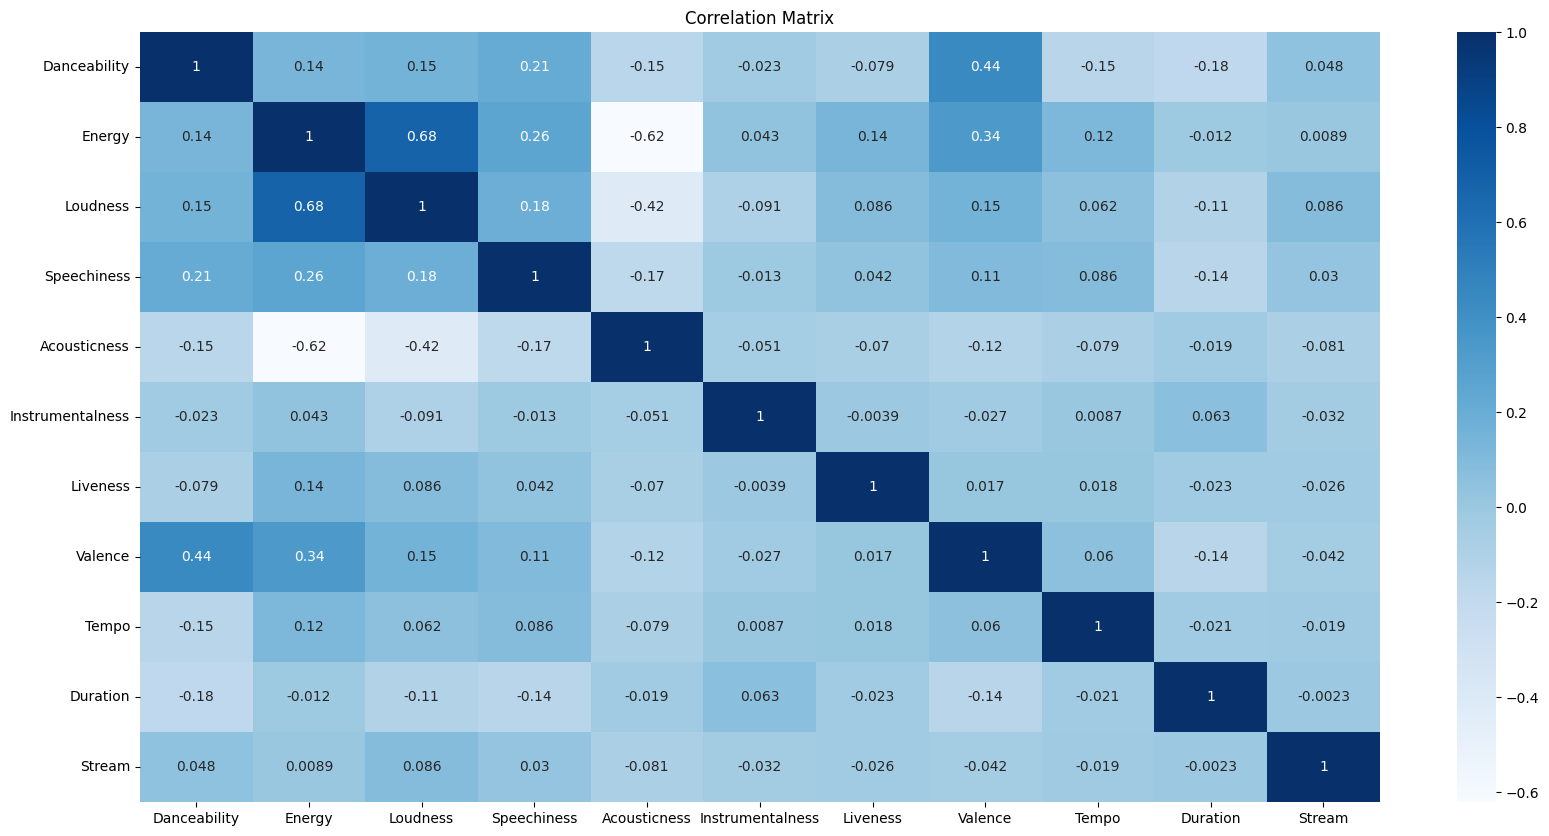

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df3.corr(), cmap="Blues", annot=True)
plt.title('Correlation Matrix')
plt.show()

Sampling df3 into df4 containing only 100 rows in order to be able to construct comprehensible visualizations.

In [ ]:
df4 = df3.sample(n=35)

In [ ]:
df4.shape #verifying whether the sample is made

(35, 11)

Using df3 for the scatter plot, as in this case the higher the number of rows, the clearer we can see the distribution.

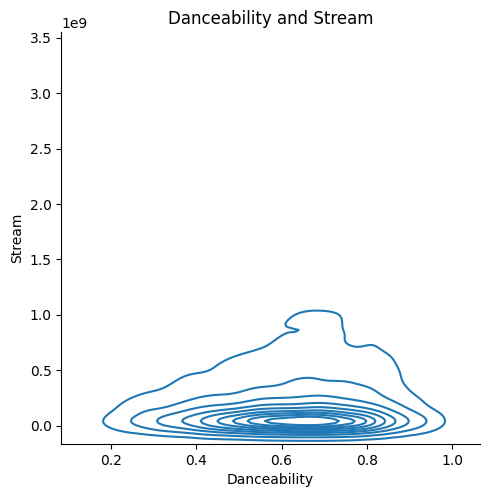

In [ ]:
sns.displot(data=df3, x="Danceability", y="Stream", kind="kde")
plt.title('Danceability and Stream')
plt.show()

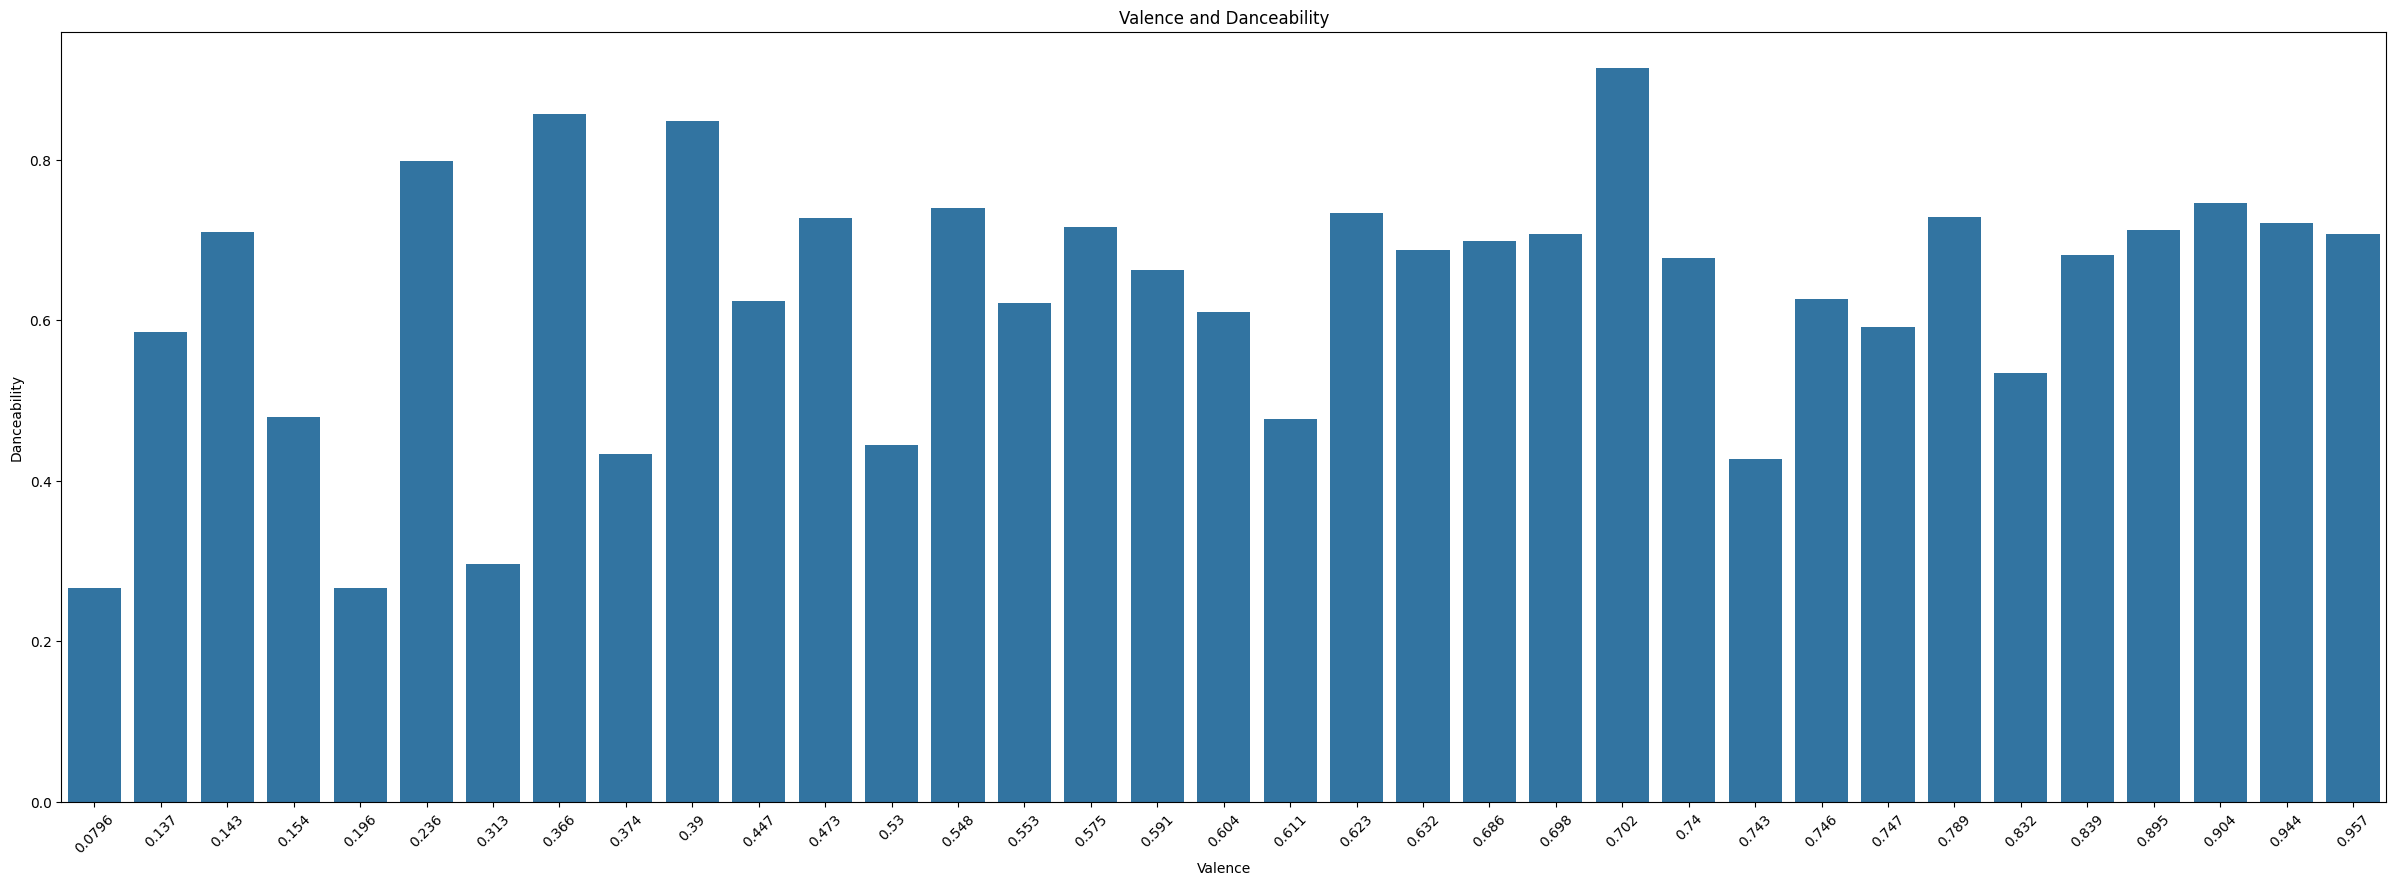

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='Valence', y='Danceability', data=df4)
plt.title('Valence and Danceability')
plt.xticks(rotation=45)
plt.show()

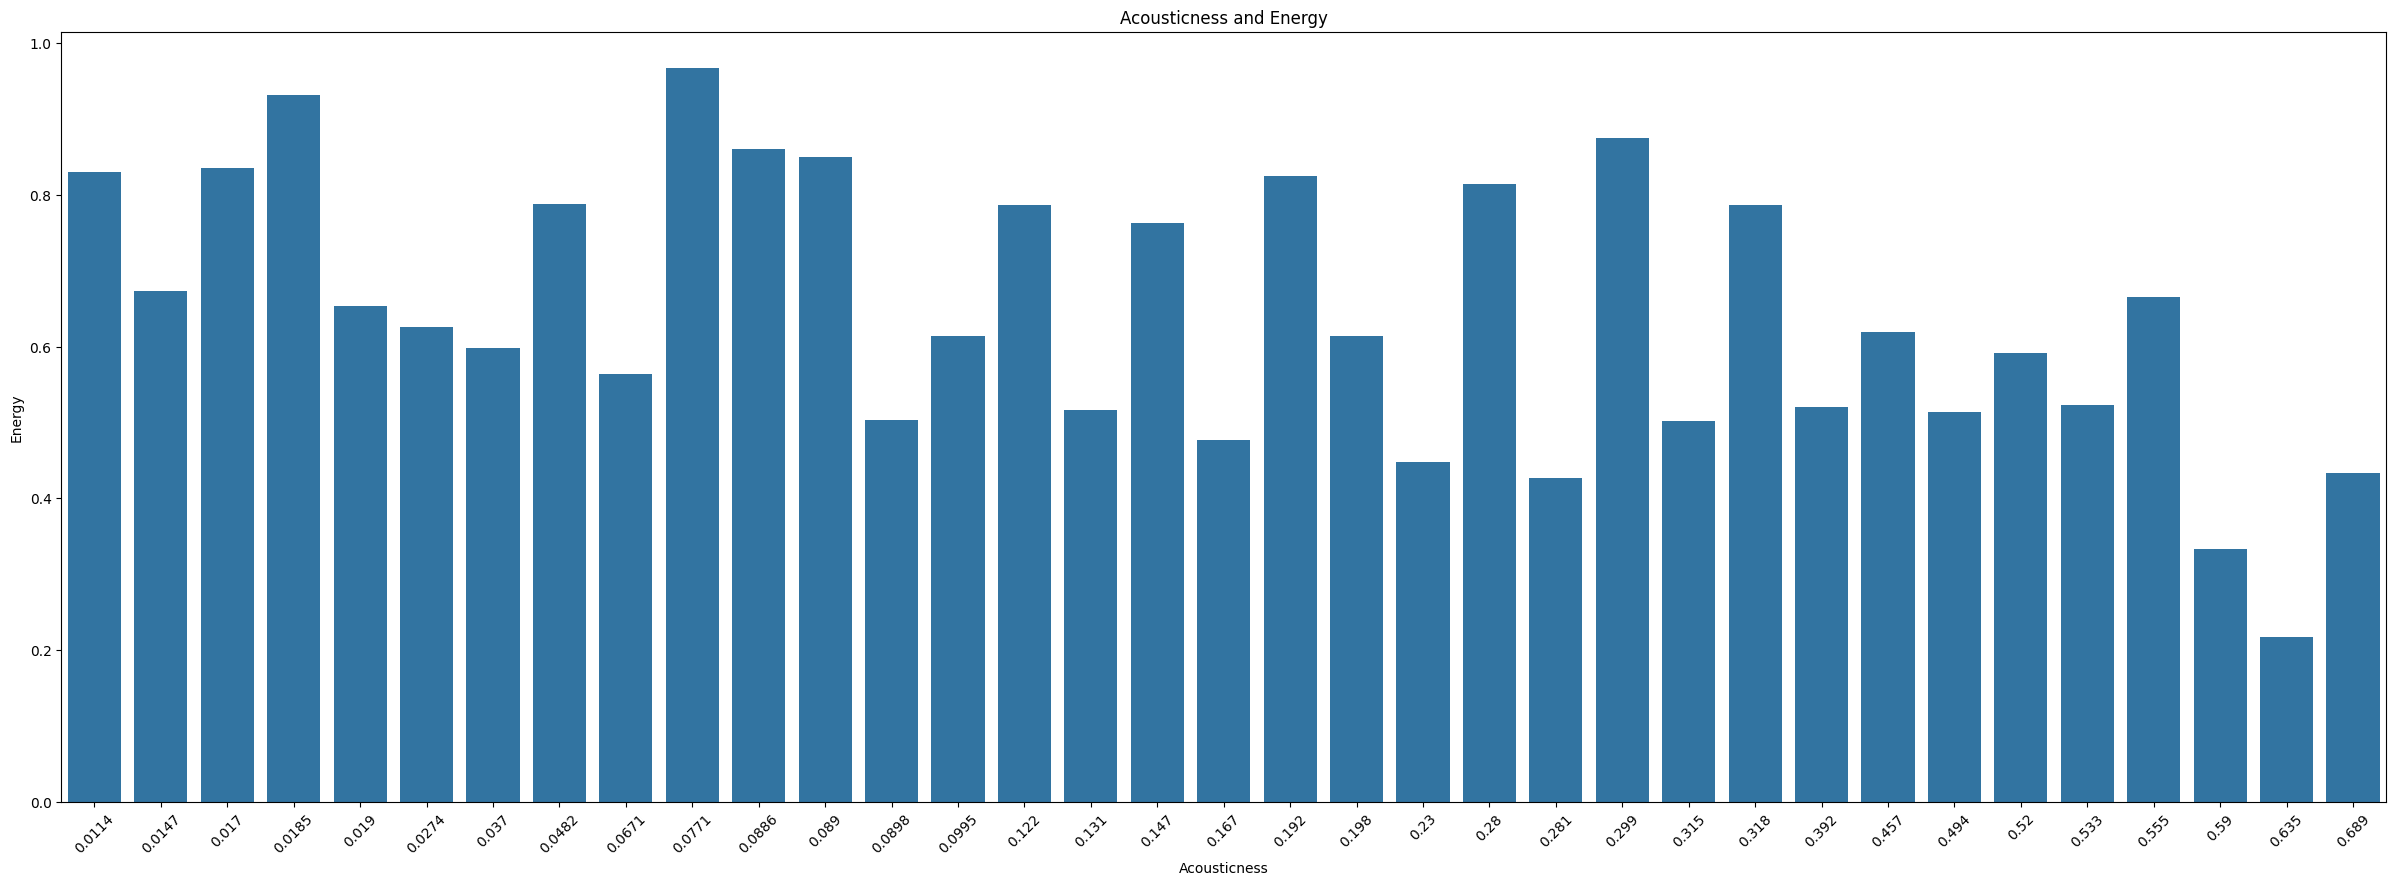

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x ='Acousticness', y='Energy', data=df4)
plt.xticks(rotation=45)
plt.title('Acousticness and Energy')
plt.show()

## **Multivariate Analysis**

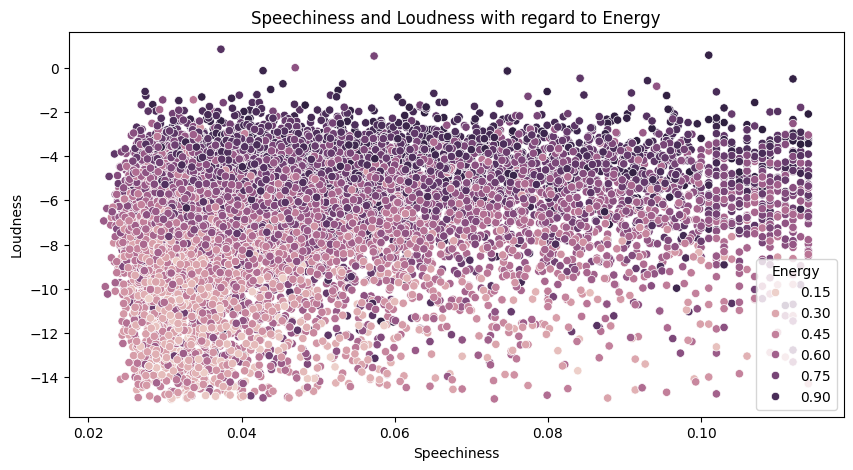

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Speechiness',y='Loudness', hue='Energy', data= df3)
plt.title('Speechiness and Loudness with regard to Energy')
plt.show()

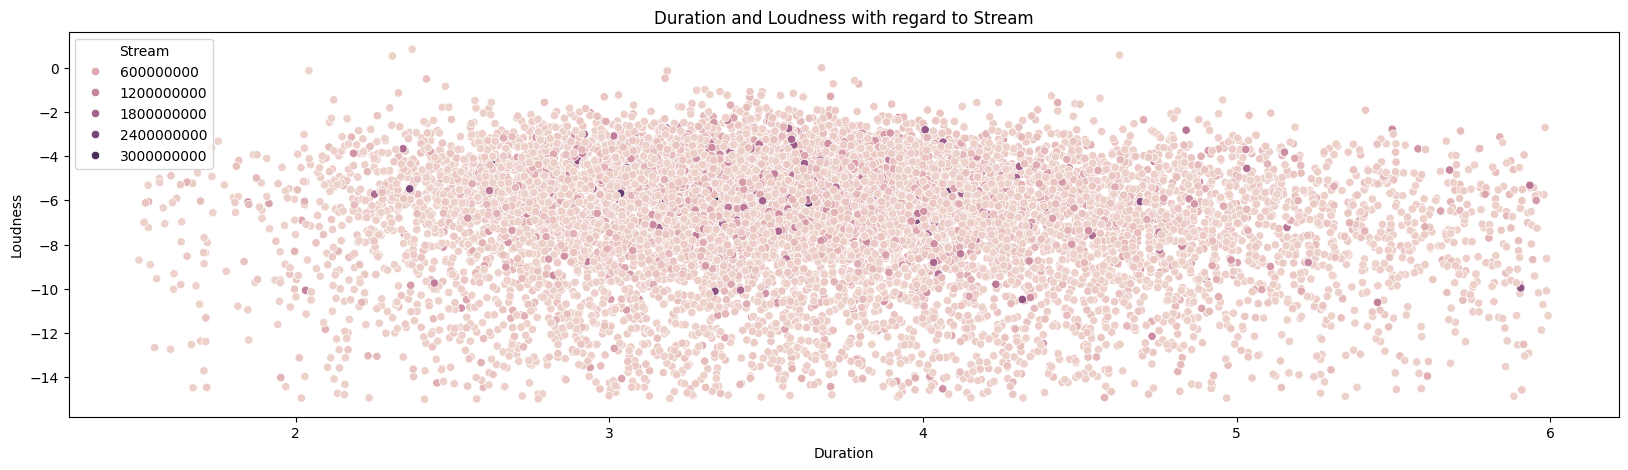

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Duration',y='Loudness', hue='Stream', data= df3)
plt.title('Duration and Loudness with regard to Stream')
plt.show()

# **M: Modeling and A: Assess**

## **Regression Model 1**

As a result of bivariate analysis, we had realised that we have a lot of columns (Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, and Tempo) that contain numbers on a certain scale, however we cannot use them while building our Regression Models as they are not numeric values wherein we cannot say that a song with, for example, a lower Danceability value is worse than a song with a higher Danceability value.

In order to resolve this issue, we are first going to convert all the above mentioned columns into categories, and then create df4 which contains only Loudness and Duration as they are our only numeric columns.

Then, we are going to make our Regression Models using df4.

In [ ]:
df3.dtypes

Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration            float64
Stream              float64
dtype: object

In [ ]:
df3['Danceability'] = df3['Danceability'].astype('category')
df3['Energy'] = df3['Energy'].astype('category')
df3['Speechiness'] = df3['Speechiness'].astype('category')
df3['Acousticness'] = df3['Acousticness'].astype('category')
df3['Instrumentalness'] = df3['Instrumentalness'].astype('category')
df3['Liveness'] = df3['Liveness'].astype('category')
df3['Valence'] = df3['Valence'].astype('category')
df3['Tempo'] = df3['Tempo'].astype('category')

In [ ]:
df3.dtypes

Danceability        category
Energy              category
Loudness             float64
Speechiness         category
Acousticness        category
Instrumentalness    category
Liveness            category
Valence             category
Tempo               category
Duration             float64
Stream               float64
dtype: object

In [ ]:
df5 = df3.drop(['Danceability','Energy','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo'], axis = 1)

In [ ]:
df5.dtypes

Loudness    float64
Duration    float64
Stream      float64
dtype: object

In [ ]:
df5.head(10)

,Loudness,Duration,Stream
1,-5.815,3.336217,3.100837e+08
2,-3.930,3.585833,6.306347e+07
5,-5.852,4.083333,3.238503e+08
7,-5.886,3.492667,1.596059e+08
10,-2.788,5.495550,1.055738e+09
11,-13.496,4.405117,1.061751e+09
12,-3.442,4.483333,8.664650e+08
13,-4.803,3.598450,6.138387e+08
14,-3.265,4.256217,7.327745e+08
15,-3.674,5.577783,8.607223e+08


In [ ]:
X = df5[['Loudness','Duration']]

In [ ]:
Y = df5[['Stream']]

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X,Y)

LinearRegression()

In [ ]:
regr.predict(X)

array([[1.57903622e+08],
       [1.74525347e+08],
       [1.59333553e+08],
       ...,
       [1.59012493e+08],
       [1.49296058e+08],
       [1.65104479e+08]])

In [ ]:
df5['Predicted_Streams'] = regr.predict(X)

In [ ]:
df5.head(10)

,Loudness,Duration,Stream,Predicted_Streams
1,-5.815,3.336217,3.100837e+08,1.579036e+08
2,-3.930,3.585833,6.306347e+07,1.745253e+08
5,-5.852,4.083333,3.238503e+08,1.593336e+08
7,-5.886,3.492667,1.596059e+08,1.576649e+08
10,-2.788,5.495550,1.055738e+09,1.887020e+08
11,-13.496,4.405117,1.061751e+09,9.504495e+07
12,-3.442,4.483333,8.664650e+08,1.807735e+08
13,-4.803,3.598450,6.138387e+08,1.671268e+08
14,-3.265,4.256217,7.327745e+08,1.817491e+08
15,-3.674,5.577783,8.607223e+08,1.813554e+08


In [ ]:
regr.coef_.tolist()

[[8508643.448963925, 2335312.6240748465]]

In [ ]:
regr.intercept_

array([1.99590274e+08])

From the above coefficients and intercept, we can say that the equation used for this regression is:

Predicted Stream = (2e+08) + (8508643.4 * Loudness) + (2335312.6 * Duration)

In [ ]:
df5['Residual'] = df5['Stream'] - df5['Predicted_Streams']

In [ ]:
df5.head(10)

,Loudness,Duration,Stream,Predicted_Streams,Residual
1,-5.815,3.336217,3.100837e+08,1.579036e+08,1.521801e+08
2,-3.930,3.585833,6.306347e+07,1.745253e+08,-1.114619e+08
5,-5.852,4.083333,3.238503e+08,1.593336e+08,1.645168e+08
7,-5.886,3.492667,1.596059e+08,1.576649e+08,1.941061e+06
10,-2.788,5.495550,1.055738e+09,1.887020e+08,8.670364e+08
11,-13.496,4.405117,1.061751e+09,9.504495e+07,9.667056e+08
12,-3.442,4.483333,8.664650e+08,1.807735e+08,6.856914e+08
13,-4.803,3.598450,6.138387e+08,1.671268e+08,4.467119e+08
14,-3.265,4.256217,7.327745e+08,1.817491e+08,5.510254e+08
15,-3.674,5.577783,8.607223e+08,1.813554e+08,6.793669e+08


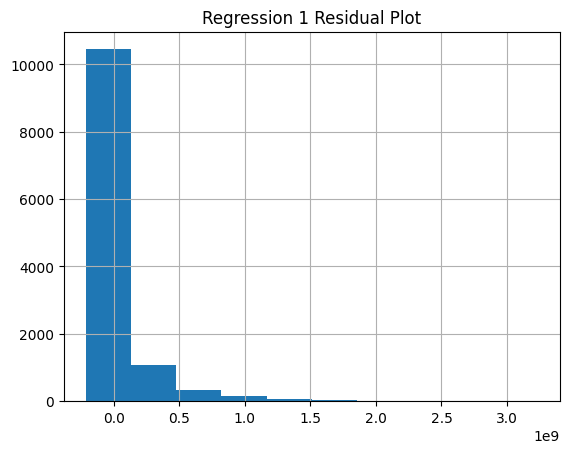

In [ ]:
df5.hist('Residual')
plt.title('Regression 1 Residual Plot')
plt.show()

In [ ]:
regr.score(X,Y)

0.007470813758610362

## **Regression Model 2**

In [ ]:
X1 = df5[['Duration']]

In [ ]:
Y1 = df5[['Stream']]

In [ ]:
regr1 = linear_model.LinearRegression()

In [ ]:
regr1.fit(X1,Y1)

LinearRegression()

In [ ]:
regr1.predict(X1)

array([[1.51211314e+08],
       [1.51023312e+08],
       [1.50648613e+08],
       ...,
       [1.52544074e+08],
       [1.52535701e+08],
       [1.52006290e+08]])

In [ ]:
df5['Predicted_Stream_1'] = regr1.predict(X1)

In [ ]:
df5.head(10)

,Loudness,Duration,Stream,Predicted_Streams,Residual,Predicted_Stream_1
1,-5.815,3.336217,3.100837e+08,1.579036e+08,1.521801e+08,1.512113e+08
2,-3.930,3.585833,6.306347e+07,1.745253e+08,-1.114619e+08,1.510233e+08
5,-5.852,4.083333,3.238503e+08,1.593336e+08,1.645168e+08,1.506486e+08
7,-5.886,3.492667,1.596059e+08,1.576649e+08,1.941061e+06,1.510935e+08
10,-2.788,5.495550,1.055738e+09,1.887020e+08,8.670364e+08,1.495850e+08
11,-13.496,4.405117,1.061751e+09,9.504495e+07,9.667056e+08,1.504063e+08
12,-3.442,4.483333,8.664650e+08,1.807735e+08,6.856914e+08,1.503473e+08
13,-4.803,3.598450,6.138387e+08,1.671268e+08,4.467119e+08,1.510138e+08
14,-3.265,4.256217,7.327745e+08,1.817491e+08,5.510254e+08,1.505184e+08
15,-3.674,5.577783,8.607223e+08,1.813554e+08,6.793669e+08,1.495230e+08


In [ ]:
regr1.coef_.tolist()

[[-753163.2685009988]]

In [ ]:
regr1.intercept_

array([1.5372403e+08])

From the above coefficients and intercept, we can say that the equation used for this regression is:

Predicted Stream = (1.5e+08) + (-753163.3 * Duration)

In [ ]:
df5['Residual_1'] = df5['Stream'] - df5['Predicted_Stream_1']

In [ ]:
df5.head(10)

,Loudness,Duration,Stream,Predicted_Streams,Residual,Predicted_Stream_1,Residual_1
1,-5.815,3.336217,3.100837e+08,1.579036e+08,1.521801e+08,1.512113e+08,1.588724e+08
2,-3.930,3.585833,6.306347e+07,1.745253e+08,-1.114619e+08,1.510233e+08,-8.795984e+07
5,-5.852,4.083333,3.238503e+08,1.593336e+08,1.645168e+08,1.506486e+08,1.732017e+08
7,-5.886,3.492667,1.596059e+08,1.576649e+08,1.941061e+06,1.510935e+08,8.512447e+06
10,-2.788,5.495550,1.055738e+09,1.887020e+08,8.670364e+08,1.495850e+08,9.061534e+08
11,-13.496,4.405117,1.061751e+09,9.504495e+07,9.667056e+08,1.504063e+08,9.113443e+08
12,-3.442,4.483333,8.664650e+08,1.807735e+08,6.856914e+08,1.503473e+08,7.161176e+08
13,-4.803,3.598450,6.138387e+08,1.671268e+08,4.467119e+08,1.510138e+08,4.628249e+08
14,-3.265,4.256217,7.327745e+08,1.817491e+08,5.510254e+08,1.505184e+08,5.822561e+08
15,-3.674,5.577783,8.607223e+08,1.813554e+08,6.793669e+08,1.495230e+08,7.111993e+08


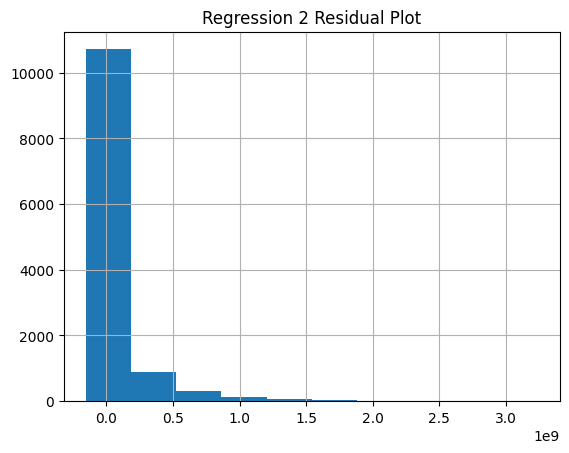

In [ ]:
df5.hist('Residual_1')
plt.title('Regression 2 Residual Plot')
plt.show()

In [ ]:
regr1.score(X1,Y1)

5.395405601071879e-06

## **Regression Model 3**

In [ ]:
X2 = df5[['Loudness']]

In [ ]:
Y2 = df5[['Stream']]

In [ ]:
regr2 = linear_model.LinearRegression()

In [ ]:
regr2.fit(X2,Y2)

LinearRegression()

In [ ]:
regr2.predict(X2)

array([[1.58593303e+08],
       [1.74486481e+08],
       [1.58281342e+08],
       ...,
       [1.63787042e+08],
       [1.54133096e+08],
       [1.68171367e+08]])

In [ ]:
df5['Predicted_Stream_2'] = regr2.predict(X2)

In [ ]:
df5.head(10)

,Loudness,Duration,Stream,Predicted_Streams,Residual,Predicted_Stream_1,Residual_1,Predicted_Stream_2
1,-5.815,3.336217,3.100837e+08,1.579036e+08,1.521801e+08,1.512113e+08,1.588724e+08,1.585933e+08
2,-3.930,3.585833,6.306347e+07,1.745253e+08,-1.114619e+08,1.510233e+08,-8.795984e+07,1.744865e+08
5,-5.852,4.083333,3.238503e+08,1.593336e+08,1.645168e+08,1.506486e+08,1.732017e+08,1.582813e+08
7,-5.886,3.492667,1.596059e+08,1.576649e+08,1.941061e+06,1.510935e+08,8.512447e+06,1.579947e+08
10,-2.788,5.495550,1.055738e+09,1.887020e+08,8.670364e+08,1.495850e+08,9.061534e+08,1.841151e+08
11,-13.496,4.405117,1.061751e+09,9.504495e+07,9.667056e+08,1.504063e+08,9.113443e+08,9.383177e+07
12,-3.442,4.483333,8.664650e+08,1.807735e+08,6.856914e+08,1.503473e+08,7.161176e+08,1.786010e+08
13,-4.803,3.598450,6.138387e+08,1.671268e+08,4.467119e+08,1.510138e+08,4.628249e+08,1.671259e+08
14,-3.265,4.256217,7.327745e+08,1.817491e+08,5.510254e+08,1.505184e+08,5.822561e+08,1.800934e+08
15,-3.674,5.577783,8.607223e+08,1.813554e+08,6.793669e+08,1.495230e+08,7.111993e+08,1.766449e+08


In [ ]:
regr2.coef_.tolist()

[[8431394.046780486]]

In [ ]:
regr2.intercept_

array([2.0762186e+08])

From the above coefficients and intercept, we can say that the equation used for this regression is:

Predicted Stream = 8431394.05 + (2.1e+08* Loudness)

In [ ]:
df5['Residual_2'] = df5['Stream'] - df5['Predicted_Stream_2']

In [ ]:
df5.head(10)

,Loudness,Duration,Stream,Predicted_Streams,Residual,Predicted_Stream_1,Residual_1,Predicted_Stream_2,Residual_2
1,-5.815,3.336217,3.100837e+08,1.579036e+08,1.521801e+08,1.512113e+08,1.588724e+08,1.585933e+08,1.514904e+08
2,-3.930,3.585833,6.306347e+07,1.745253e+08,-1.114619e+08,1.510233e+08,-8.795984e+07,1.744865e+08,-1.114230e+08
5,-5.852,4.083333,3.238503e+08,1.593336e+08,1.645168e+08,1.506486e+08,1.732017e+08,1.582813e+08,1.655690e+08
7,-5.886,3.492667,1.596059e+08,1.576649e+08,1.941061e+06,1.510935e+08,8.512447e+06,1.579947e+08,1.611255e+06
10,-2.788,5.495550,1.055738e+09,1.887020e+08,8.670364e+08,1.495850e+08,9.061534e+08,1.841151e+08,8.716233e+08
11,-13.496,4.405117,1.061751e+09,9.504495e+07,9.667056e+08,1.504063e+08,9.113443e+08,9.383177e+07,9.679188e+08
12,-3.442,4.483333,8.664650e+08,1.807735e+08,6.856914e+08,1.503473e+08,7.161176e+08,1.786010e+08,6.878639e+08
13,-4.803,3.598450,6.138387e+08,1.671268e+08,4.467119e+08,1.510138e+08,4.628249e+08,1.671259e+08,4.467128e+08
14,-3.265,4.256217,7.327745e+08,1.817491e+08,5.510254e+08,1.505184e+08,5.822561e+08,1.800934e+08,5.526812e+08
15,-3.674,5.577783,8.607223e+08,1.813554e+08,6.793669e+08,1.495230e+08,7.111993e+08,1.766449e+08,6.840774e+08


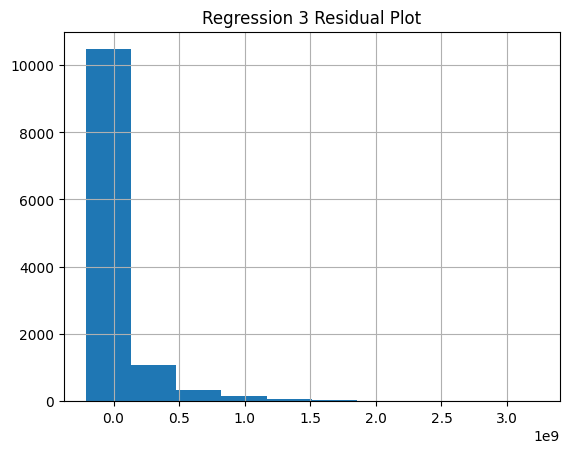

In [ ]:
df5.hist('Residual_2')
plt.title('Regression 3 Residual Plot')
plt.show()

In [ ]:
regr2.score(X2,Y2)

0.007419564243183352